# Análise de Capacidade Operacional

Este projeto tem como objetivo analisar a capacidade operacional de uma equipe de suporte técnico.

Perguntas principais:
- Qual o volume diário de tickets?
- Qual o tempo médio de resolução?
- Quem resolve mais rápido?
- Existe risco de backlog?

A proposta é avaliar se a operação está equilibrada ou se existe risco de acúmulo estrutural de tickets.


In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from src.data_processing import tratar_dados
from src.metrics import (
    volume_diario_recebidos,
    volume_diario_resolvidos,
    tempo_medio_resolucao_horas,
    performance_media_por_analista,
    capacidade_backlog_diaria
)

df = tratar_dados()
df.head()


,status_ticket,prioridade,origem_ticket,topico,analista_responsavel,data_abertura,sla_previsto_resolucao,tempo_primeira_resposta,tempo_resolucao,data_fechamento,tempo_resolucao_horas
id_ticket,,,,,,,,,,,
1012,Closed,Low,Email,Feature request,Kristos Westoll,2023-01-02 00:58:36,2023-01-04 00:58:36,2023-01-02 01:03:17.432,2023-01-04 00:31:51.694,2023-01-04 04:02:59.013,51.073059
1013,In progress,High,Phone,Product setup,Adolpho Messingham,2023-01-02 07:27:25,2023-01-04 07:27:25,2023-01-02 07:27:43.231,NaT,NaT,NaN
1014,Resolved,Low,Chat,Purchasing and invoicing,Bernard Beckley,2023-01-02 06:59:04,2023-01-03 06:59:04,2023-01-02 06:59:57.471,2023-01-02 22:45:32.974,NaT,NaN
1015,Closed,Medium,Email,Pricing and licensing,Connor Danielovitch,2023-01-03 03:09:39,2023-01-05 03:09:39,2023-01-03 07:09:15.835,2023-01-04 14:32:34.979,2023-01-08 04:24:54.771,121.254381
1016,Closed,Low,Email,Product setup,Kristos Westoll,2023-01-03 00:03:58,2023-01-05 00:03:58,2023-01-03 00:08:01.684,2023-01-04 12:03:05.986,2023-01-06 06:05:08.637,78.019621


## Volume Diário de Tickets

Realizada a análise da quantidade de tickets recebidos e resolvidos por dia para avaliar o equilíbrio operacional.

In [3]:
vol_rec = volume_diario_recebidos(df)
vol_res = volume_diario_resolvidos(df)

vol_rec.head()


,recebidos
data_abertura,
2023-01-02,3
2023-01-03,9
2023-01-04,9
2023-01-05,6
2023-01-06,6


<Axes: title={'center': 'Volume Diário Recebido'}, xlabel='data_abertura'>

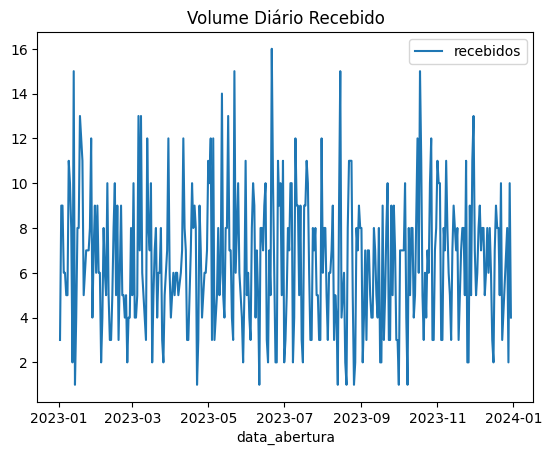

In [4]:
vol_rec.plot(title="Volume Diário Recebido")

## Análise de Backlog

Calculado o saldo diário entre tickets recebidos e resolvidos.
Saldo positivo indica risco de acúmulo.

In [5]:
cap = capacidade_backlog_diaria(df)
cap.head()

,recebidos,resolvidos,saldo
2023-01-02,3.0,0.0,3.0
2023-01-03,9.0,0.0,9.0
2023-01-04,9.0,1.0,8.0
2023-01-05,6.0,1.0,5.0
2023-01-06,6.0,4.0,2.0


## Tempo Médio de Resolução

O tempo médio de resolução indica eficiência operacional.

In [6]:
tempo_med = tempo_medio_resolucao_horas(df)
tempo_med

95.08615949464811

## Performance por Analista

Comparação do tempo médio de resolução por analista.

In [7]:
perf = performance_media_por_analista(df)
perf

,tempo_medio_horas
analista_responsavel,
Michele Whyatt,85.050719
Adolpho Messingham,92.459512
Heather Urry,94.762783
Kristos Westoll,95.069469
Bernard Beckley,96.202313
Sheela Cutten,96.358307
Connor Danielovitch,97.116617
Nicola Wane,97.428503


<Axes: title={'center': 'Tempo Médio por Analista'}, xlabel='analista_responsavel'>

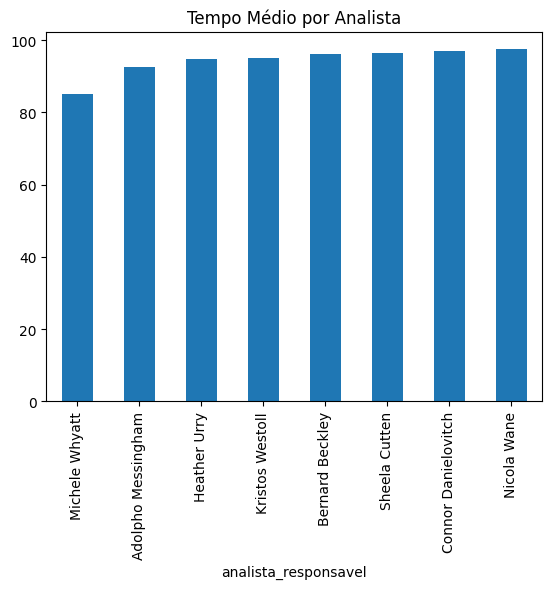

In [8]:
perf["tempo_medio_horas"].plot(kind="bar", title="Tempo Médio por Analista")

# Conclusão Executiva

Com base na análise:

- O volume diário apresenta variação consistente.
- Existe tendência de saldo positivo em determinados períodos.
- A performance entre analistas apresenta variação.
- O tempo médio de resolução está em 95 horas.

Conclusão:
A operação apresenta risco potencial de backlog caso a demanda cresça sem aumento proporcional da capacidade.

Recomendação:
Monitoramento contínuo do saldo diário e avaliação de capacidade futura.